<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 300, align = "center"></a>
# <center>Hierarchical Clustering</center>

### <b>Welcome to Lab 4b of Machine Learning with Python.</b>
<p><b>Machine Learning is a form of artificial intelligence (AI), where the system can "learn" without explicitly being coded</b></p>

In this lab exercise, you will learn some popular machine learning algorithms. For <b>supervised learning</b>, we will discuss <b>decision trees</b> and <b>random forests</b>. In <b>unsupervised learning</b>, we will discuss <b>k-means clustering</b>, <b>agglomerative hierarchical clustering</b>, and <b>density-based clustering</b> or <b>DBSCAN</b>.


### Some Notebook Commands Reminders:
<ul>
    <li>Run a cell: CTRL + ENTER</li>
    <li>Create a cell above a cell: a</li>
    <li>Create a cell below a cell: b</li>
    <li>Change a cell to Markdown: m</li>
    
    <li>Change a cell to code: y</li>
</ul>

<b> If you are interested in more keyboard shortcuts, go to Help -> Keyboard Shortcuts </b>

<b> <i> Before starting the lab, please run the following code in order to access the solutions </i> </b>

In [1]:
from IPython.core.display import HTML
HTML("""
<style type="text/css">
    #ans:hover { background-color: black; }
    #ans {padding: 6px; 
        background-color: white; 
        border: green 2px solid;
        font-weight: bold}
</style>
""") 

# <u> Hierarchical Clustering - Agglomerative</u> 

We will be looking at the next clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

---
Import Libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>ndimage</b> from <b>scipy</b> </li>
    <li> <b>hierarchy</b> from <b>scipy.cluster</b> </li>
    <li> <b>pyplot as plt</b> from <b>matplotlib</b> </li>
    <li> <b>manifold</b> from <b>sklearn</b> </li>
    <li> <b>datasets</b> from <b>sklearn</b> </li>
    <li> <b>AgglomerativeClustering</b> from <b>sklearn</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
</ul> <br>
Also run <b>%matplotlib inline</b> that that wasn't run already.

In [13]:
import numpy as np 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline 

Hover over the green box below for the answer
<p id = "ans"> <font color = "white"> 
import numpy as np <br>
from scipy import ndimage <br>
from scipy.cluster import hierarchy <br>
from scipy.spatial import distance_matrix <br>
from matplotlib import pyplot as plt <br>
from sklearn import manifold, datasets <br>
from sklearn.cluster import AgglomerativeClustering <br>
from sklearn.datasets.samples_generator import make_blobs <br>
%matplotlib inline
</font> </p>

---
### Generating Random Data
We will be generating another set of data using the <b>make_blobs</b> class once again. This time you will input your own values! <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X2</b> and <b>y2</b>.

In [17]:
X2, y2 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
print(len(X2))
print(len(y2))

50
50


Hover over the green box below for an example answer (This will be used for the remainder of the example).
<p id = "ans"> <font color = "white"> 
X2, y2 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
</font> </p>

Plot the scatter plot of the randomly generated data

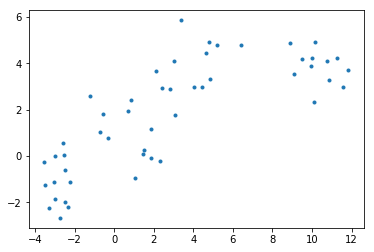

In [4]:
plt.scatter(X2[:, 0], X2[:, 1], marker='.')

---
### Agglomerative Clustering
We will start by clustering the random data points we just created.

The <b> AgglomerativeClustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>

In [18]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
print(agglom)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func=<function mean at 0x107671268>)


Hover over the green box below for the answer
<p id = "ans"> <font color = "white"> 
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
</font> </p>

Fit the model with <b> X2 </b> and <b> y2 </b> from the generated data above.

In [19]:
agglom.fit(X2,y2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func=<function mean at 0x107671268>)

Hover over the green box below for the answer
<p id = "ans"> <font color = "white"> 
agglom.fit(X2,y2)
</font> </p>

Run the following code to show the clustering! <br>
Remember to read the code and comments to gain more understanding on how the plotting works.

[0. 0.]
[1. 1.]


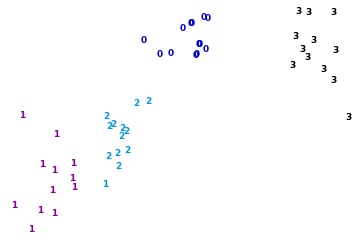

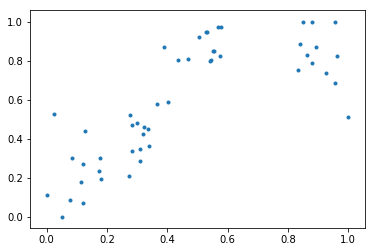

In [22]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X2.
x_min, x_max = np.min(X2, axis=0), np.max(X2, axis=0)
print(x_min)
print(x_max)

# Get the average distance for X2.
X2 = (X2 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X2.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X2[i, 0], X2[i, 1], str(y2[i]),
             color=plt.cm.spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Display the plot
plt.show()

# Display the plot of the original data before clustering
plt.scatter(X2[:, 0], X2[:, 1], marker='.')

---
### Dendrogram Associated for the Agglomerative Hierarchical Clustering
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [8]:
dist_matrix = distance_matrix(X2,X2) 
print(dist_matrix)

[[0.         0.82726183 0.71941336 ... 0.2633334  0.38465243 0.45032938]
 [0.82726183 0.         0.21149628 ... 0.86616378 0.45546667 0.39388519]
 [0.71941336 0.21149628 0.         ... 0.70373375 0.40223691 0.36023059]
 ...
 [0.2633334  0.86616378 0.70373375 ... 0.         0.50411602 0.56081186]
 [0.38465243 0.45546667 0.40223691 ... 0.50411602 0.         0.0656906 ]
 [0.45032938 0.39388519 0.36023059 ... 0.56081186 0.0656906  0.        ]]


Hover over the green box below for the answer
<p id = "ans"> <font color = "white"> 
dist_matrix = distance_matrix(X2,X2) <br>
print(dist_matrix)
</font> </p>

Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>

In [12]:
Z = hierarchy.linkage(dist_matrix, 'complete')
print(Z)

[[ 8.         39.          0.10110022  2.        ]
 [17.         29.          0.10793575  2.        ]
 [21.         22.          0.11782191  2.        ]
 [42.         48.          0.12733155  2.        ]
 [26.         37.          0.13318366  2.        ]
 [20.         23.          0.13911724  2.        ]
 [ 0.         19.          0.14775078  2.        ]
 [ 3.         12.          0.16609053  2.        ]
 [25.         38.          0.16955869  2.        ]
 [11.         52.          0.17550006  3.        ]
 [15.         32.          0.19279169  2.        ]
 [33.         36.          0.20198347  2.        ]
 [30.         57.          0.20622804  3.        ]
 [ 1.          7.          0.22674042  2.        ]
 [31.         35.          0.27130243  2.        ]
 [18.         44.          0.2855047   2.        ]
 [50.         55.          0.28805272  4.        ]
 [ 5.         40.          0.30149649  2.        ]
 [45.         54.          0.33747651  3.        ]
 [ 6.         63.          0.35

/Users/gayatri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Hover over the green box below for the answer
<p id = "ans"> <font color = "white"> 
Z = hierarchy.linkage(dist_matrix, 'complete')
</font> </p>

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

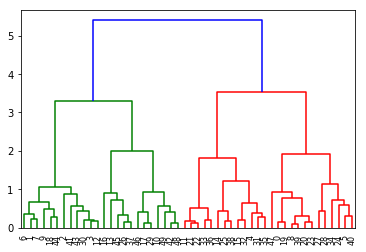

In [11]:
dendro = hierarchy.dendrogram(Z)

Hover over the green box below the answer
<p id = "ans"> <font color = "white"> 
dendro = hierarchy.dendrogram(Z)
</font> </p>

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0101EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0101EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0101EN_DSX)

---
# Additional Resources
<br>
General Clustering: http://scikit-learn.org/stable/modules/clustering.html 
<br><br>
Hierarchical Clustering: <br>
https://www.youtube.com/watch?v=OcoE7JlbXvY <br>
https://www.youtube.com/watch?v=MIWVfCcHzM4 <br>
https://www.youtube.com/watch?v=2z5wwyv0Zk4

<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​